In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from matplotlib.colors import ListedColormap
from mpl_toolkits import mplot3d
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [0]:
matplotlib_axes_logger.setLevel('ERROR')

In [0]:
zero_one_colourmap = ListedColormap(('red', 'green'))

# Plotting Decision Boundary Function

In [0]:
def plot_decision_boundary(X, y, clf):
  X_set, y_set = X, y
  X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
  plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
  plt.xlim(X1.min(), X1.max())
  plt.ylim(X2.min(), X2.max())
  for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
  plt.title('SVM Decision Boundary')
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.legend()
  return plt.show()

# Plotting 3D Plot

In [0]:
def plot_3d_plot(X, y):
  r = np.exp(-(X ** 2).sum(1))
  ax = plt.subplot(projection='3d')
  ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap=zero_one_colourmap)
  ax.set_xlabel('X1')
  ax.set_ylabel('X2')
  ax.set_zlabel('y')
  return ax

# Reading the Data

In [0]:
df = pd.read_excel("SVM_Data.xlsx")

In [164]:
df.head()

,X1,X2,Y
0,-0.364924,0.230728,1
1,-0.293515,-0.974130,0
2,0.470622,0.966409,0
3,-0.549030,0.869911,0
4,-1.072329,-0.195141,0


In [0]:
X = df.loc[:, ["X1", "X2"]].values
y = df.loc[:, "Y"].values

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 0)

# Linear Classifier

In [0]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [168]:
accuracy_score(y_test, y_pred)

0.46153846153846156

In [169]:
confusion_matrix(y_test, y_pred)

array([[0, 7],
       [0, 6]])

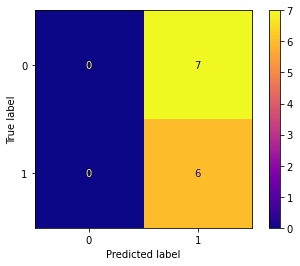

In [170]:
plot_confusion_matrix(classifier, X_test, y_test, cmap="plasma")

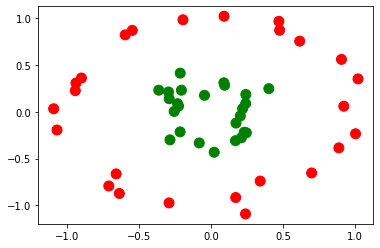

In [171]:
plt.scatter(X[:,0],X[:,1], c=y, s=100, cmap = zero_one_colourmap)
plt.show()

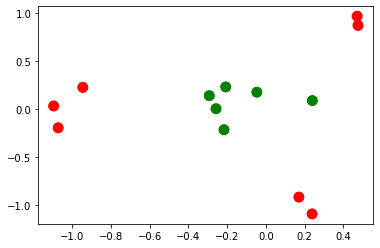

In [172]:
plt.scatter(X_test[:,0],X_test[:,1], c=y_test, s=100, cmap = zero_one_colourmap)
plt.show()

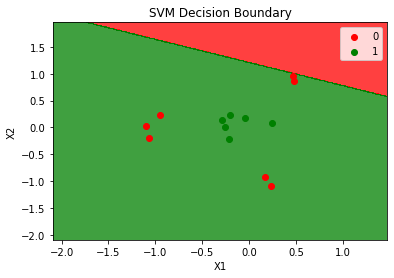

In [173]:
plot_decision_boundary(X_test, y_test, classifier)

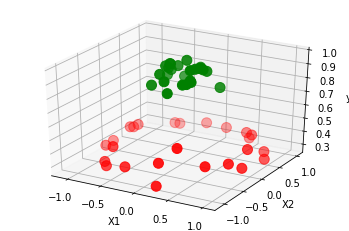

In [174]:
plot_3d_plot(X, y)

# Non Linear SVM Classifier

In [0]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train.ravel())
y_pred = rbf_classifier.predict(X_test)

In [176]:
accuracy_score(y_test, y_pred)

1.0

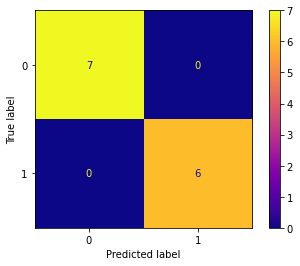

In [177]:
plot_confusion_matrix(rbf_classifier, X_test, y_test, cmap="plasma")

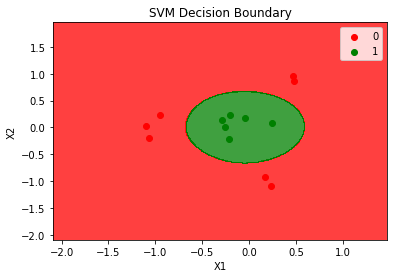

In [178]:
plot_decision_boundary(X_test, y_test, rbf_classifier)